In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import pairwise_distances
import seaborn as sns 

In [2]:
test1 = pd.read_csv('../Data/Test1.csv', index_col=0)
test2 = pd.read_csv('../Data/Test2.csv', index_col=0)
test4 = pd.read_csv('../Data/Test4.csv', index_col=0)
data = pd.concat([test1, test2, test4])
data.head()

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
t,,,,,,,,,,,,,,,,,,
1636579517,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2023,-179.8798,22.3221,783.1761,-772.5771,-2.326357,9.639795,-32.645949,11.805614,18.656085,-12.831012
1636579518,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-2.192611,9.531656,-33.073905,11.697159,18.462518,-12.250218
1636579519,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-2.103594,9.776526,-31.435784,11.662171,18.601191,-11.455588
1636579520,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-1.869649,9.100982,-31.719140,11.414681,18.489816,-12.538161
1636579521,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-2.336206,9.058406,-32.329481,11.223285,17.952984,-10.425429


In [103]:
data.shape

(69239, 18)

## 3D visualisations

To comprehend the shape of the data in three dimensions, we plot it on a trisurf plot. Essentially, this is the 3-D triangular surface defined by the points in vectors x, y, and z, creating a triangle connectivity matrix. Here, the color is proportional to surface height to better visualize the position along the z-axis.

*A Tri-Surface Plot is a type of surface plot, created by triangulation of compact surfaces of finite number of triangles which cover the whole surface in a manner that each and every point on the surface is in triangle. The intersection of any two triangles results in void or a common edge or vertex.* - [web source](https://www.geeksforgeeks.org/tri-surface-plot-in-python-using-matplotlib/#)

In [67]:
def trisurf_plot(xR1, yR1, zR1, title):
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    
    surf = ax.plot_trisurf(xR1, yR1, zR1, cmap=plt.get_cmap('rainbow'), linewidth=0.1)
    ax.set_xlabel('R1 x')
    ax.set_ylabel('R1 y')
    ax.set_zlabel('R1 z')

    plt.colorbar(surf, shrink=0.5, aspect=5, orientation="horizontal", pad=0.2)  
    ax.set_title(title)
    plt.show()

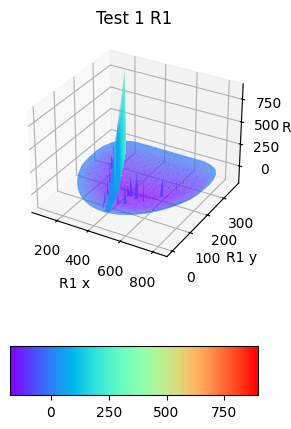

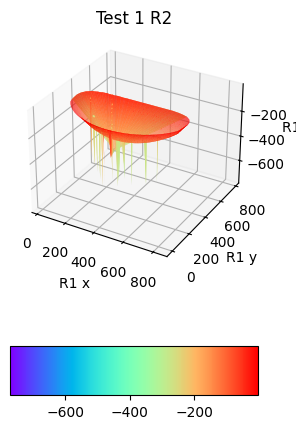

In [65]:
trisurf_plot(test1['x_enc_1'], test1['y_enc_1'], test1['z_enc_1'], 'Test 1 R1')
trisurf_plot(test1['x_enc_2'], test1['y_enc_2'], test1['z_enc_2'], 'Test 1 R2')

### Normalization 

Our dataset comprises values distributed across various points within our three-dimensional space. Due to this dispersion, visualizing the positions of distinct structures becomes challenging unless they are graphically scaled equivalently. To address this, we employ min-max normalization techniques, ensuring that each value is rescaled to fall within the range of 0 to 1. 

In [3]:
test1Normal = (test1-test1.min())/(test1.max()-test1.min())
test2Normal = (test2-test2.min())/(test2.max()-test2.min())
test4Normal = (test4-test4.min())/(test4.max()-test4.min())

test1Normal.head()

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
t,,,,,,,,,,,,,,,,,,
1636579517,0.999999,0.871111,0.001021,0.167619,0.88303,1.0,0.065516,0.713972,0.000334,0.000004,0.999998,0.0,0.505069,0.453696,0.013134,0.551163,0.555107,0.996751
1636579518,0.999999,0.871111,0.001021,0.167619,0.88303,1.0,0.065516,0.714001,0.000334,0.000002,0.999998,0.0,0.505104,0.453670,0.013010,0.551123,0.555040,0.997002
1636579519,0.999999,0.871111,0.001021,0.167619,0.88303,1.0,0.065516,0.714001,0.000334,0.000002,0.999998,0.0,0.505127,0.453730,0.013485,0.551111,0.555088,0.997346
1636579520,0.999999,0.871111,0.001021,0.167619,0.88303,1.0,0.065516,0.714001,0.000334,0.000002,0.999998,0.0,0.505189,0.453564,0.013403,0.551020,0.555049,0.996878
1636579521,0.999999,0.871111,0.001021,0.167619,0.88303,1.0,0.065516,0.714001,0.000334,0.000002,0.999998,0.0,0.505066,0.453554,0.013226,0.550949,0.554864,0.997792


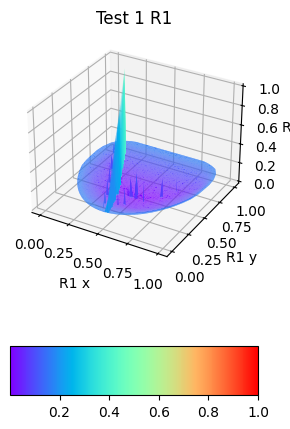

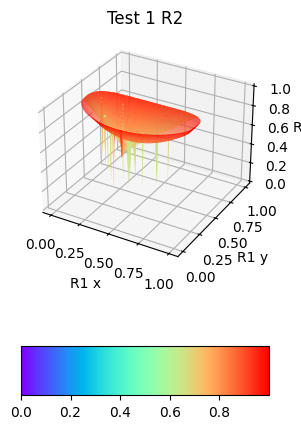

In [71]:
trisurf_plot(test1Normal['x_enc_1'], test1Normal['y_enc_1'], test1Normal['z_enc_1'], 'Test 1 R1')
trisurf_plot(test1Normal['x_enc_2'], test1Normal['y_enc_2'], test1Normal['z_enc_2'], 'Test 1 R2')

# trisurf_plot(test2Normal['x_enc_1'], test2Normal['y_enc_1'], test2Normal['z_enc_1'], 'Test 2 R1')
# trisurf_plot(test2Normal['x_enc_2'], test2Normal['y_enc_2'], test2Normal['z_enc_2'], 'Test 2 R2')

# trisurf_plot(test4Normal['x_enc_1'], test4Normal['y_enc_1'], test4Normal['z_enc_1'], 'Test 4 R1')
# trisurf_plot(test4Normal['x_enc_2'], test4Normal['y_enc_2'], test4Normal['z_enc_2'], 'Test 4 R2')

Plot side by side for better comparison. 

In [72]:
def trisurf_subplot(xR1, yR1, zR1, xR2, yR2, zR2, title):
    fig = plt.figure()
    
    ax1 = fig.add_subplot(121,projection='3d')
    surf1 = ax1.plot_trisurf(xR1, yR1, zR1, cmap=plt.get_cmap('rainbow'), linewidth=0.1)
    ax1.set_xlabel('R1 x')
    ax1.set_ylabel('R1 y')
    ax1.set_zlabel('R1 z')

    ax2 = fig.add_subplot(122,projection='3d')
    surf2 = ax2.plot_trisurf(xR2, yR2, zR2, cmap=plt.get_cmap('rainbow'),linewidth=0.1)
    ax2.set_xlabel('R2 x')
    ax2.set_ylabel('R2 y')
    ax2.set_zlabel('R2 z')

    plt.show()

# 3D rendering 

As you can see, the trisurf plot does its best to triangulate a surface based on our directions. However, it is imperfect at determining the outcome surface because of the robot's movement in the positive and negative z-directions. I am interested in learning from the team what alternative 3D rendering algorithms are better suited for this dataset!

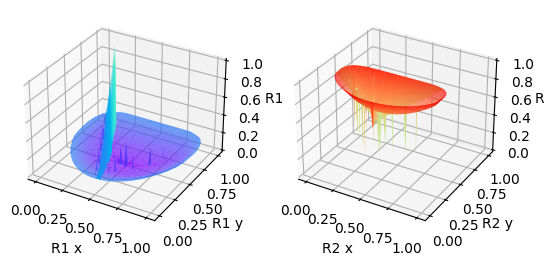

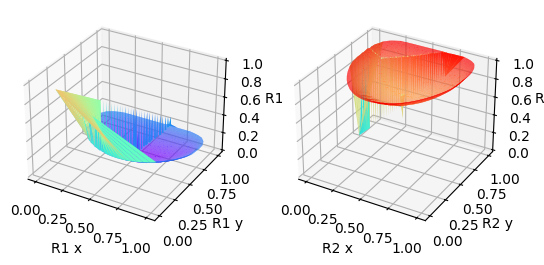

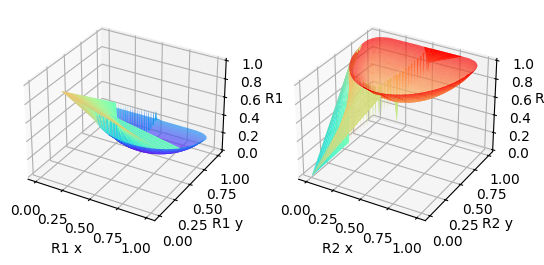

In [73]:
trisurf_subplot(test1Normal['x_enc_1'], test1Normal['y_enc_1'], test1Normal['z_enc_1'],
             test1Normal['x_enc_2'], test1Normal['y_enc_2'], test1Normal['z_enc_2'], 'Test 1')
trisurf_subplot(test2Normal['x_enc_1'], test2Normal['y_enc_1'], test2Normal['z_enc_1'], 
             test2Normal['x_enc_2'], test2Normal['y_enc_2'], test2Normal['z_enc_2'], 'Test 2')
trisurf_subplot(test4Normal['x_enc_1'], test4Normal['y_enc_1'], test4Normal['z_enc_1'], 
             test4Normal['x_enc_2'], test4Normal['y_enc_2'], test4Normal['z_enc_2'], 'Test 4')

## 2D visualisations

In the previous visualizations we notice that the structure created is not perfectly smooth. Before my conversion with Tayor I assumed these were annomolies in our dataset. However, after our discssion I have determined that these points are useful for the robot inorder to form our structure due to the pinching mechinisim. Still, for a closer look at this I've plotted the x,y,z coordinates in 2 dimensions where hue reflects the 3rd dimension. 


[Text(0.5, 1.0, 'test 1 R1')]

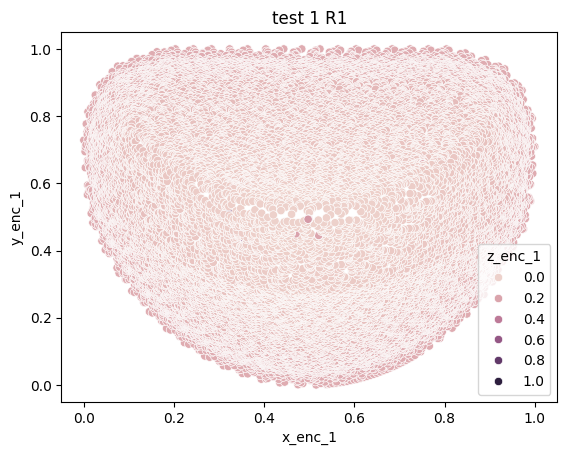

In [28]:
sns.scatterplot(data=test1Normal, x="x_enc_1", y="y_enc_1", hue="z_enc_1").set(title='test 1 R1')

[Text(0.5, 1.0, 'test 1 R2')]

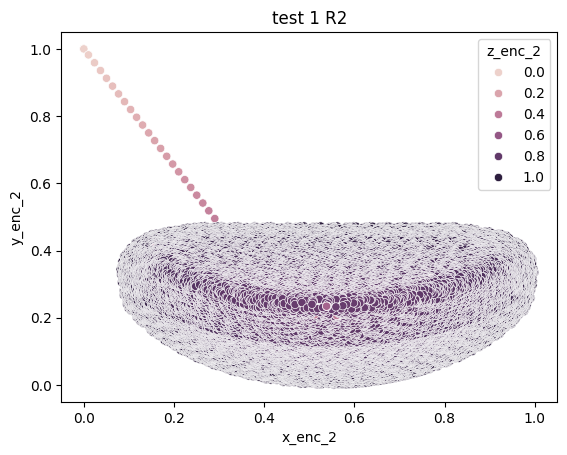

In [29]:
sns.scatterplot(data=test1Normal, x="x_enc_2", y="y_enc_2", hue="z_enc_2").set(title='test 1 R2')

[Text(0.5, 1.0, 'test 1 R1')]

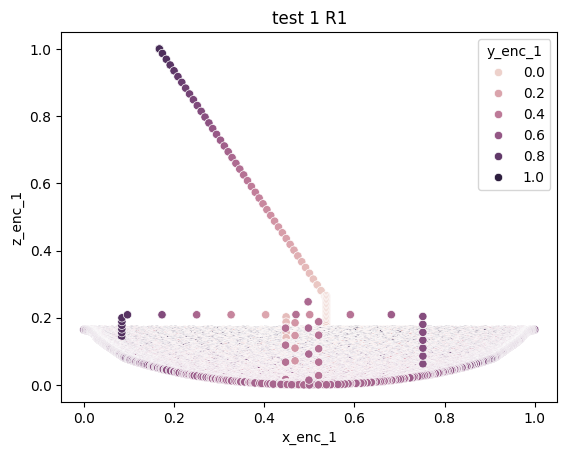

In [30]:
sns.scatterplot(data=test1Normal, x="x_enc_1", y="z_enc_1", hue="y_enc_1").set(title='test 1 R1')

[Text(0.5, 1.0, 'test 1 R2')]

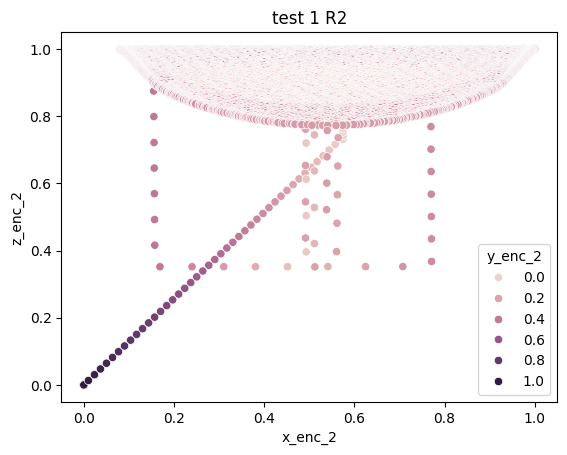

In [31]:
sns.scatterplot(data=test1Normal, x="x_enc_2", y="z_enc_2", hue="y_enc_2").set(title='test 1 R2')

[Text(0.5, 1.0, 'test 1 R1')]

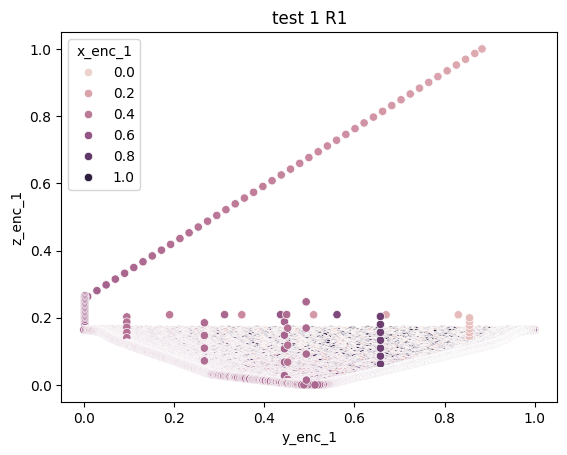

In [32]:
sns.scatterplot(data=test1Normal, x="y_enc_1", y="z_enc_1", hue="x_enc_1").set(title='test 1 R1')

[Text(0.5, 1.0, 'test 1 R2')]

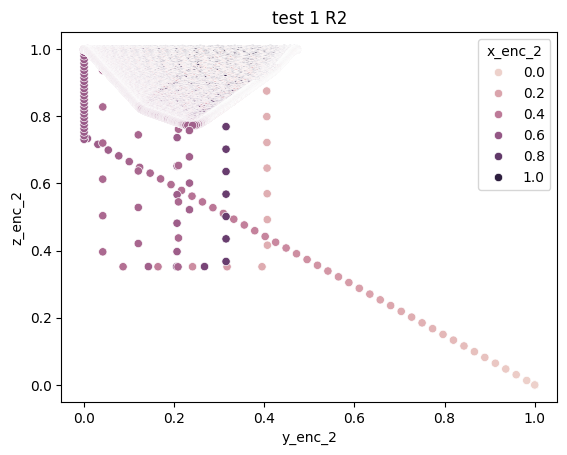

In [33]:
sns.scatterplot(data=test1Normal, x="y_enc_2", y="z_enc_2", hue="x_enc_2").set(title='test 1 R2')

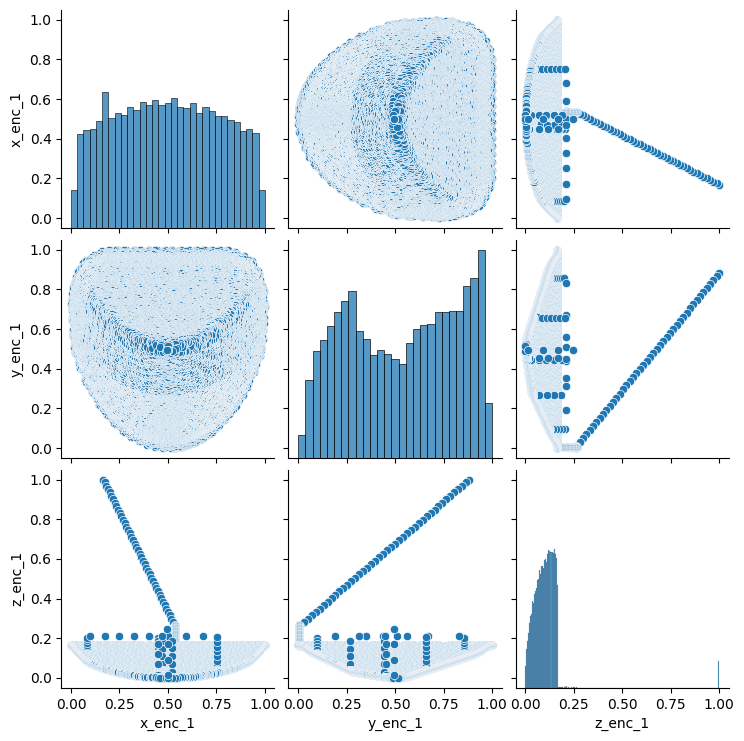

In [8]:
sns.pairplot(test1Normal[['x_enc_1', 'y_enc_1', 'z_enc_1']])

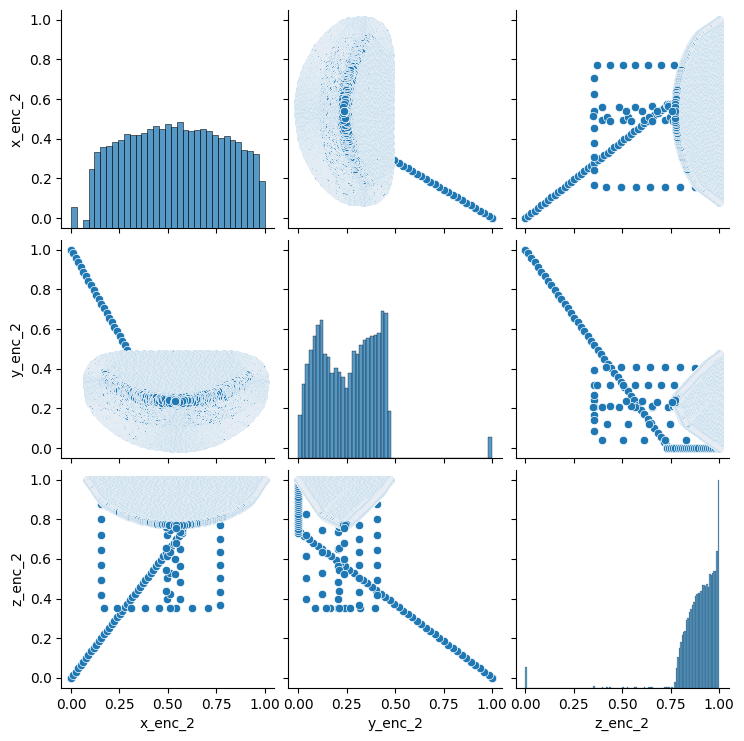

In [9]:
sns.pairplot(test1Normal[['x_enc_2', 'y_enc_2', 'z_enc_2']])